# Laboratorio de experimentos

In [164]:
%%manim -ql -v WARNING Axes # No funciona

class Axes(VectorScene):
    def construct(self):
        
        axes = Axes(
            x_range=[0, 10, 1],
            y_range=[-2, 6, 1],
            tips=False,
            axis_config={"include_numbers": True},
            y_axis_config={"scaling": LogBase(custom_labels=True)},
        )
        #self.add_axes()
        self.add(axes) # se ve igual que add_plane
        self.wait()

KeyError: '#'

In [1]:
from manim import * # Debemos importar Manim Community v0.15.2

Manim Community v0.15.2

# Escenas vectoriales 2D

En este _notebook_, veremos las clases más relevantes para poder hacer animaciones relacionadas con espacios vectoriales de dos dimensiones.

## Mobjects

Lo que más nos interesa animar son vectores flecha sobre un plano cartesiano. El plano se genera con un `Mobject` correspondiente a la clase [`NumberPlane`](https://docs.manim.community/en/stable/reference/manim.mobject.graphing.coordinate_systems.NumberPlane.html?highlight=NumberPlane):

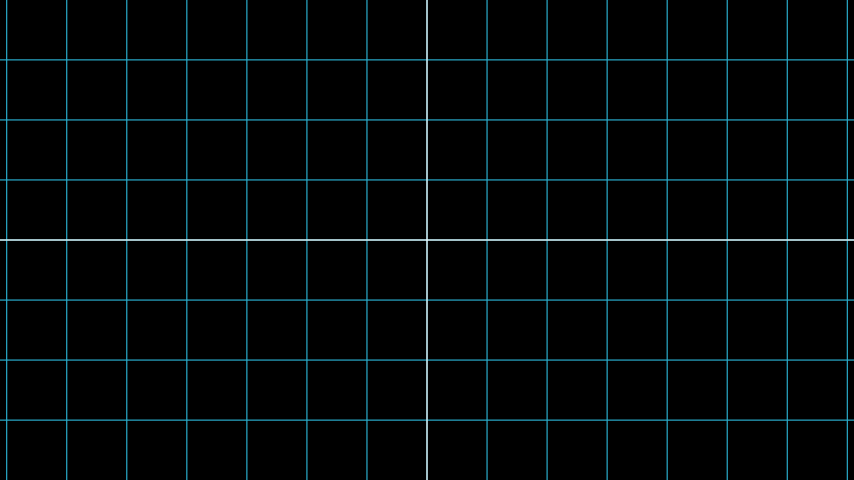

In [13]:
%%manim -ql -v WARNING Plane

class Plane(Scene):      
    def construct(self):
        self.add(NumberPlane())

**Nota** Aprenderemos más sobre `NumberPlane` y otros sistemas coordenados cuando veamos el tema de Ejes; en este _notebook_ sólo utilizaremos el plano como un sistema de referencia.

Por otro lado, los vectores flecha se crean con la clase `Vector`, la cual es subclase de `Arrow` que, a su vez, es subclase de `Líne`. Como sabemos que, por herencia, `Vector` heredará todos los métodos de `Line` y, en particular, también los de `Arrow`, estudiaremos estas clases yendo de lo general a lo particular, empezando por `Line`.

## Líneas con la clase [`Mobject -> VMobject -> SVGMobject -> Line`](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.Line.html#manim.mobject.geometry.line.Line)

En Manim, las líneas se crean instanciando un objeto de la clase `Line`.

Los **parámetros** del método especial de inicialización `__init__` de `Line` son

* `start`, un arreglo con la coordenada donde inicia la línea;
* `end`, un arreglo con la coordenada donde termina la línea;
* `buff` (opcional), un número que determina la distancia entre `start` y el comienzo de la línea, así como la distancia entre `end` y el final de la línea;
* `path_arc` (opcional), un número que determina qué tan curveada es la línea.

**Nota** En la primera línea de la [definición de `__init__`](https://docs.manim.community/en/stable/_modules/manim/mobject/geometry/line.html#Line) se observa que la clase `Line` tiene tres dimensiones, por lo que **los arreglos de las coordenadas de inicio** (`start`) **y fin** (`end`) **siempre deben corresponder a coordenadas en tres dimensiones**; para esto, podemos simplemente poner la tercer entrada como 0.

Podemos experimentar con los parámetros de `Line` modificándolos en la siguiente celda (hemos dividido la declaración de `Line` en varios renglones por claridad):

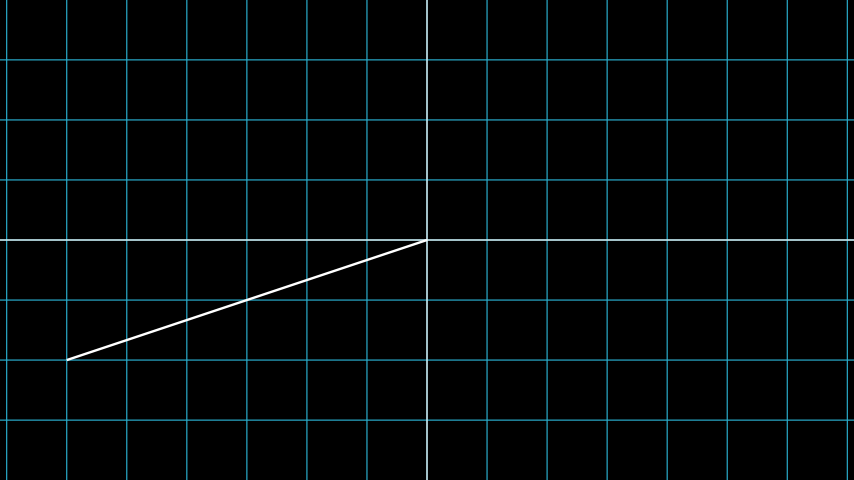

In [11]:
%%manim -ql -v WARNING LineParameters

class LineParameters(Scene):
    def construct(self):
        self.add(NumberPlane())
        # Creamos una línea
        línea = Line([-6,-2,0], # desde (-6.2)
                     [0,0,0],   # hasta (0,0),
                     0,         # sin buff y
                     0)         # sin curvatura, y
        self.add(línea)         # la añadimos a la escena.

Los **métodos** "getter" de `Line` incluyen:

* `get_start`,
* `get_end`,
* `get_angle`,
* `get_slope`,
* `get_vector`,
* `get_unit_vector`, y
* `get_projection`,

cuyo uso se ejemplifica en la siguiente celda:

In [50]:
línea = Line([-6,-2,0],[6,-2,0],0,0)

línea.get_start() # Devuelve la coordenada en donde empieza.

#línea.get_end() # Devuelve la coordenada en donde termina.

#línea.get_angle() # Devuelve el ángulo en radianes.

#línea.get_slope() # Devuelve la pendiente.

#línea.get_vector() # Devuelve sus coordenadas como vector con
                   # origen en las coordenadas de la variable.
    
#línea.get_unit_vector() # Devuelve el vector normal en el sentido
                        # y dirección del vector de get_vector.
    
#línea.get_projection(3) # Devuelve la proyección de un punto del
                        # el eje horizontal sobre la línea

array([-6., -2.,  0.])

Por otro lado, los "setters" incluyen:

* `set_path_arc`,
* `set_angle`,
* `set_length`, y
* `set_points_by_ends`,

cuyo uso se ejemplifica en la siguiente celda:

In [8]:
%%manim -ql -v WARNING LineSetters

class LineSetters(Scene):
    def construct(self):
        self.add(NumberPlane())
            
        # Creamos una línea y la añadimos:
        línea = Line([-2,1,0],[2,1,0],0,0)
        self.add(línea)
        self.wait()
        
        # Cambiamos su longitud:
        línea.set_length(2)
        self.wait()
        
        # Cambiamos su ángulo alrededor del punto de inicio de la línea (start):
        línea.set_angle(1.57)
        self.wait()
        
        # Cambiamos sus coordenadas:
        línea.set_points_by_ends([-2,3,0],[2,3,0])
        self.wait()
        
        # Cambiamos su longitud de nuevo:
        línea.set_length(8)
        self.wait()
        
        # Cambiamos su ángulo alrededor del punto (0,0) (el origen):
        línea.set_angle(0.77,[0,0,0])
        self.wait()
        
        # Cambiamos el arco de la línea:
        línea.set_path_arc(1)
        self.wait()

**Nota (_glitch?!_)** En el [código fuente de `Line`](https://docs.manim.community/en/stable/_modules/manim/mobject/geometry/line.html#Line), el método `set_points_by_ends` puede también tomar parámetros de `buff` y `path_arc`; sin embargo, la utilización de estos parámetros no parece estar bien implementada, pues al agregar estos argumentos en la celda anterior se obtienen resultados inesperados.

**Nota (_glitch?!_)** El método `set_path_arc` no funciona bien después de `set_points_by_ends`, **como se observa en el último segundo de la animación anterior**, pues **regresa la línea a sus coordenadas originales**. `Line` tiene otro método llamado `put_start_and_end_on` que sólo sirve para cambiar coordenadas y, a pesar de que lo hace de forma distinta a `set_points_by_ends`, tampoco funciona bien con `set_path_arc`. Por ello, ¡debemos tener mucho cuidado al usar el método `set_path_arc`!

`Line` tiene los mismos **atributos** que cualquier [`VMobject`](cualquier); los más relevantes son

* `color`, que cambia el color de la línea, y
* `stroke_width`, que cambia el grosor de la línea;

ambos pueden ser especificados dentro de los parámetros del objeto, como se muestra a continuación:

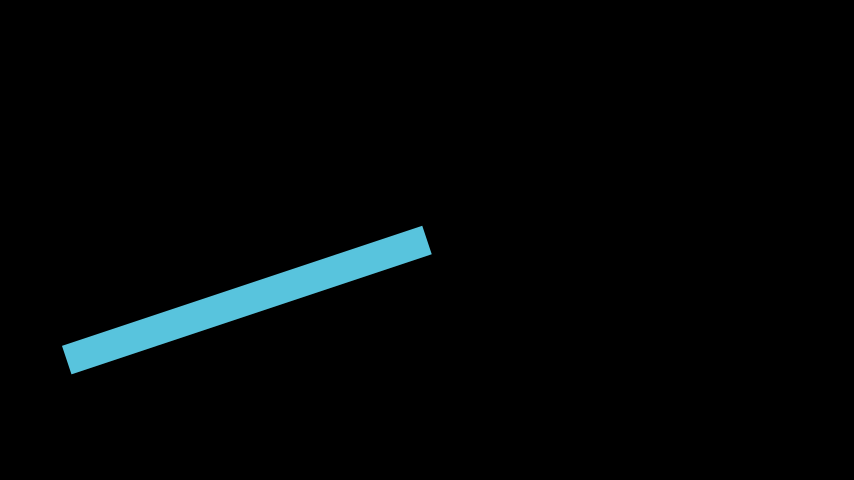

In [22]:
%%manim -ql -v WARNING LineAttributes

class LineAttributes(Scene):
    def construct(self):
                                      # Creamos una línea
        línea = Line([-6,-2,0],       # desde (-6.2)
                     [0,0,0],         # hasta (0,0),
                     0,               # sin buff,
                     0,               # sin curvatura,
                     color=BLUE,      # con color azul
                     stroke_width=50) # y grosor 50.
        self.add(línea)

### Líneas punteadas con la subclase [`Mobject -> VMobject -> SVGMobject -> Line -> DashedLine`](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.DashedLine.html#manim.mobject.geometry.line.DashedLine)

Para crear líneas punteadas, instanciamos objetos de la clase `DashedLine`, que toma los mismos argumentos que `Line` (`start`, `stop`, `buff`, `path_arch`, etc.) más
* `dash_length`, un número que determina la longitud de cada línea individual, y
* `dashed_ratio`, un número entre `0` y `1` que da la razón entre el espacio para las líneas punteadas y el espacio vacío.

Los valores predeterminados de `dash_length` y `dashed_ratio` son `0.05` y `0.5`, respectivamente.

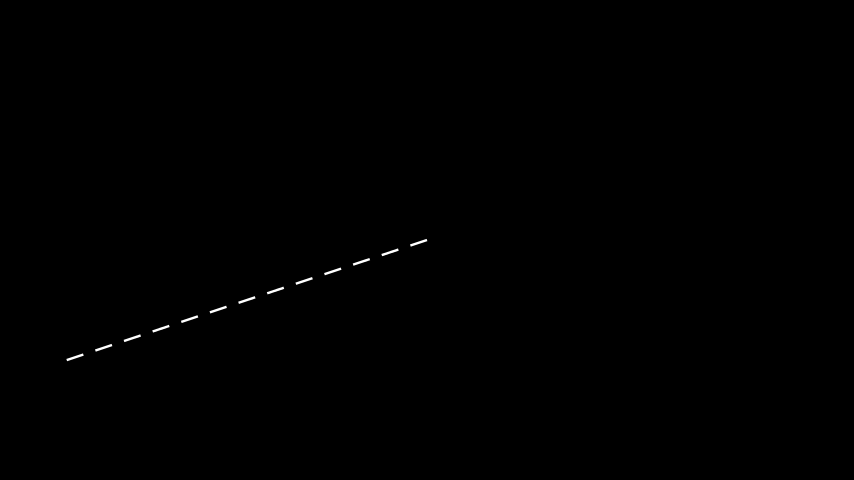

In [23]:
%%manim -ql -v WARNING DashedLineParameters

class DashedLineParameters(Scene):
    def construct(self):
        línea_punteada = DashedLine([-6,-2,0],
                                    [0,0,0],
                                    0,
                                    0,
                                    dash_length=0.3,
                                    dashed_ratio=0.6)
        línea_punteada
        self.add(línea_punteada)

**Nota** Observemos que en la celda anterior escribimos los nombres de los parámetros `dash_length` y `dashed_ratio` para poder cambiar su valor; esto es necesario pues, de lo contrario, `manim` marca un error.

Los **métodos** más relevantes de `DashedLine` son todos los que hereda de `Line`. En particular, **no existen setters (funcionales)** para `dash_length` ni `dashed_ratio`. Los **getters** de estos dos parámetros parecen funcionar, pero no aparecen en la documentación y, al ejecutarlos, arrojan una advertencia de que probablemente los quiten, por lo que es mejor sólo acceder a `dash_length` y `dashed_ratio` como atributos. Nótese que **modificar los atributos** `dash_length` y `dashed_ratio` **no tiene ningún efecto sobre las animaciones**.

In [79]:
línea_punteada = DashedLine([-6,-2,0],
                                    [0,0,0],
                                    0,
                                    0,
                                    dash_length=0.7,
                                    dashed_ratio=0.6)
línea_punteada.dash_length  # Accedemos a los atributos dash_length y
#línea_punteada.dashed_ratio # dashed_ratio.

0.7

### Flechas con la subclase [`Mobject -> VMobject -> SVGMobject -> Line -> Arrow`](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.Arrow.html#manim.mobject.geometry.line.Arrow)

Los parámetros más relevantes para crear flechas, instanciando objetos de la clase `Arrow`, son los mismos parámetros que `Line`:

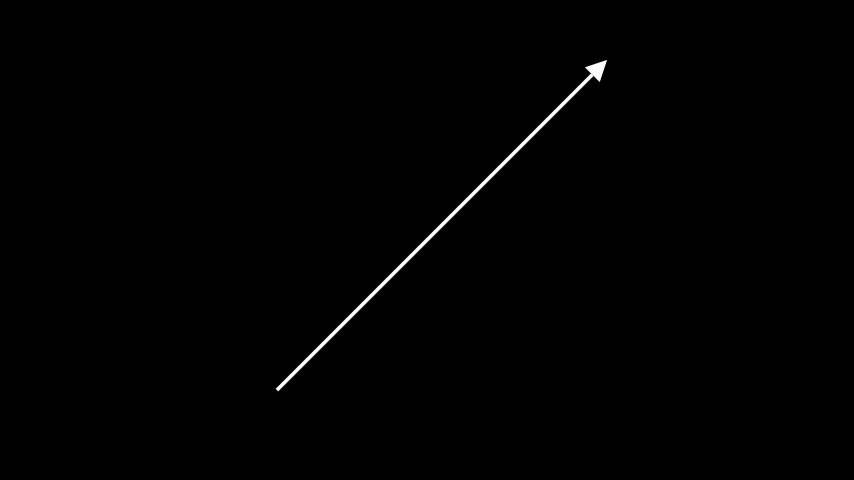

In [24]:
%%manim -ql -v WARNING ArrowParameters

class ArrowParameters(Scene):
    def construct(self):
        flecha = Arrow([-2.5,-2.5,0], # start
                      [3,3,0],       # end
                      buff=0,         
                      path_arc = 0)
        self.add(flecha)

**Nota** Por alguna razón, debemos escribir `buff=` para fijar este parámetro al crear un `Arrow`, lo cual no era necesario con `Line`; de lo contrario, `manim` marca un error.

El **método** más relevante de `Arrow` es `scale` que, a diferencia del [método genérico `scale` de la supclase `Mobject`](https://docs.manim.community/en/stable/reference/manim.mobject.mobject.Mobject.html#manim.mobject.mobject.Mobject.scale), reescala la flecha **manteniendo fijos el** `stroke_width` **y el tamaño de la punta**.

In [26]:
%%manim -ql -v WARNING ArrowScaleMethod

class ArrowScaleMethod(Scene):
    def construct(self):
        flecha = Arrow([-1,2,0],[3,0,0],stroke_width=15)
        self.add(flecha)
        self.wait()
        flecha.scale(2.5)
        self.wait()

`Arrow` no tiene atributos "particulares"; sólo los que hereda de [`VMobject`](https://docs.manim.community/en/stable/reference/manim.mobject.types.vectorized_mobject.VMobject.html#manim.mobject.types.vectorized_mobject.VMobject).

#### Flechas con doble punta con la subclase [`Mobject -> VMobject -> SVGMobject -> Line -> Arrow -> DoubleArrow`](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.DoubleArrow.html#manim.mobject.geometry.line.DoubleArrow)

Para crear una flecha con puntas en ambos extremos, inicializamos un objeto de clase `DoubleArrow`; esta clase tiene los mismos parámetros, métodos y atributos que `Arrow`:

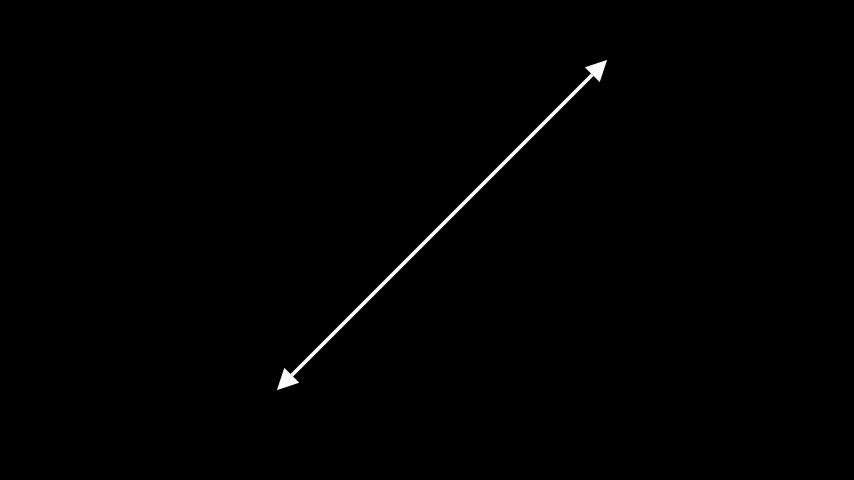

In [27]:
%%manim -ql -v WARNING ArrowParameters

class ArrowParameters(Scene):
    def construct(self):
        flecha = DoubleArrow([-2.5,-2.5,0], # start
                      [3,3,0],       # end
                      buff=0,         
                      path_arc = 0)
        self.add(flecha)

#### Vectores flecha con la subclase [`Mobject -> VMobject -> SVGMobject -> Line -> Arrow -> Vector`](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.Vector.html#manim.mobject.geometry.line.Vector)

La clase `Vector` crea una flecha (`Arrow`) con el parámetro `start` en el origen. Por lo tanto, en vez de inicializar un vector con parámetros `start` y `end`, sólo necesitamos un parámetro, llamado `direction` (que hace la función de `end`); el resto de los parámetros de `Vector` son iguales a los de `Arrow`.

In [1]:
from manim import *

Manim Community v0.15.2

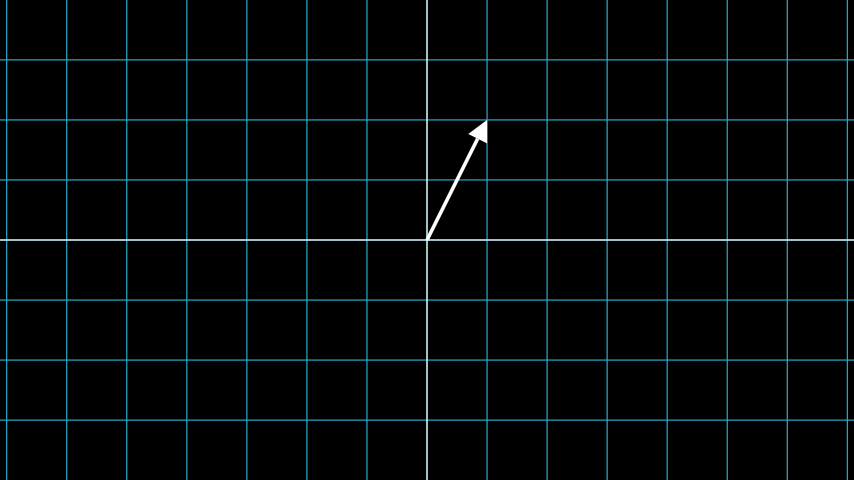

In [21]:
%%manim -ql -v WARNING VectorExample

class VectorExample(Scene):
    def construct(self):
        self.add(NumberPlane())
        
        vector = Vector([1,2]) # Creamos un vector con punta en (1,2)
        self.add(vector)       # y lo añadimos a la escena.

El único **método** "particular" de `Vector` es [`coordinate_label`](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.Vector.html#manim.mobject.geometry.line.Vector.coordinate_label), que crea un Mobject con las coordenadas del vector en cuestión escritas en forma de vector columna. Sus parámetros relevantes son

* `integer_label`, que toma un valor Booleano `True` o `False`, el cual determina si las coordenadas se redondean a enteros o no;
* `color`, el color del vector columna con las coordenadas del vector.

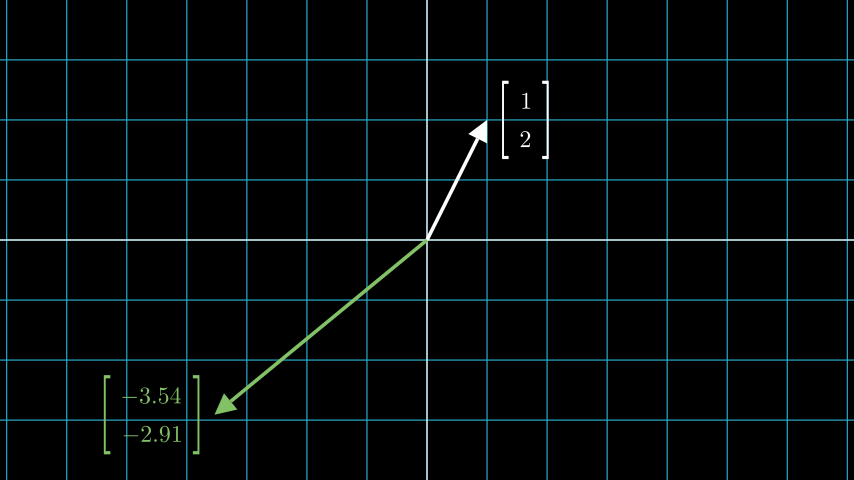

In [13]:
%%manim -ql -v WARNING VectorCoordinateLabelMethod

class VectorCoordinateLabelMethod(Scene):
    def construct(self):
        plane = NumberPlane()

        vec_1 = Vector([1,2])
        vec_2 = Vector([-3.54,-2.91],color=GREEN)
        label_1 = vec_1.coordinate_label()
        label_2 = vec_2.coordinate_label(integer_labels=False,
                                         color=GREEN)
        self.add(plane, vec_1, label_1)
        self.add(plane, vec_1, vec_2, label_1, label_2)

Los atributos de `Vector` son los mismos que hereda de [`VMobject`](https://docs.manim.community/en/stable/reference/manim.mobject.types.vectorized_mobject.VMobject.html#manim.mobject.types.vectorized_mobject.VMobject).

## Scenes

## La clase [`Scene -> VectorScene`](https://docs.manim.community/en/stable/reference/manim.scene.vector_space_scene.VectorScene.html#manim.scene.vector_space_scene.VectorScene)

Esta clase permite...

### Atributos de `VectorScene`

Al ser una subclase de `Scene`, la clase `VectorScene` hereda el atributo `camera`.

### Métodos de `VectorScene`

`add_axes`

#### `add_plane`

Para utilizar este método, debemos primero crear un Mobject tipo [`NumberPlane`](https://docs.manim.community/en/stable/reference/manim.mobject.graphing.coordinate_systems.NumberPlane.html?highlight=NumberPlane#numberplane). Luego, `self.add_plane()` añadirá el plano a la escena **sin animación**, mientras que `self.add_plane(True)` lo añadirá **con una animación**:

In [4]:
%%manim -ql -v WARNING AddPlane

class AddPlane(VectorScene): # Creamos una subclase de VectorScene
    def construct(self):
        
        NumberPlane()         # Creamos nuestro plano
        self.add_plane()      # Añadimos el plano sin animación
        #self.add_plane(True)  # Animamos el plano
        self.wait()

Este método simplemente es un atajo a los siguientes métodos de la supclase `Scene`:

In [111]:
%%manim -ql -v WARNING Plane

class Plane(Scene):      # Creamos una subclase de Scene
    def construct(self):
        
        # Comparar con self.add_plane() en la celda anterior:
        self.add(NumberPlane())
        
        # Comparar con self.add_plane(True):
        #self.play(Create(NumberPlane()))
        
        self.wait()

`add_vector`

In [28]:
%%manim -ql -v WARNING AddVector

class AddVector(VectorScene):
    def construct(self):
        
        self.add_vector([4,1], color=BLUE)
        self.wait()

### La subclase [`Scene -> VectorScene -> LinearTransformationScene`](https://docs.manim.community/en/stable/reference/manim.scene.vector_space_scene.LinearTransformationScene.html#manim.scene.vector_space_scene.LinearTransformationScene)

## Recursos adicionales
* Video [Manim Tutorial | Vectors & Matrices | Tutorial 3, Manim Explained
](https://www.youtube.com/watch?v=Yf9QnATooqA).
* Video [Vectors, Linear Transformations, and Vector Fields | Mastering Manim Chapter 6](https://www.youtube.com/watch?v=qQv_FgW9nks).
* [Manual de referencia](https://docs.manim.community/en/stable/reference.html) de Manim.